## Libraries import

In [1]:
# General imports
from __future__ import print_function, division
import os
#from engine import train_one_epoch, evaluate
import utils
import transforms as T
import matplotlib.pyplot as plt
import time
import random
import imutils
import cv2
import glob
from tqdm import tqdm
import tensorflow as tf

# Pandas
import pandas as pd

# PyTorch
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import LambdaLR
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

import torchvision
from torchvision import transforms, utils

from PIL import Image

# scikit-learn
from skimage import io, transform
from sklearn.model_selection import train_test_split

# Numpy
import numpy as np

# Ignore warnings
import warnings
#warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

## Dataset import

In [2]:
#directory = "/Users/davide/Desktop/IVU project/Project2/dataset_transformations"
directory = "/Users/davide/Desktop/IVU project/Project2/dataset_original"

class ScoreDataset(Dataset):        
    
    # GET NOTE AND REST DATASET
    def get_note_rest_dataset(self):
        data_images = []
        data_labels = []
        classes = set()
        num_classes = 0
        features = 0  # Flattened image size
        
        os.chdir("/Users/davide/Desktop/IVU project/Project2/dataset_original")
        for file in glob.glob('*.png'):
            name = file.split('-')
            if (name[0] == "note"):
                classes.add("note")
            elif (name[0] == "rest"):
                classes.add("rest")
                
        classes = list(classes)
        classes.sort()
        num_classes = len(classes)
        print(str(num_classes) + " classes found:")
        print(classes)
        
        # Creates the training set in a convenient format
        for file in glob.glob('*.png'):
            name = file.split('-')
            
            if (name[0] == "note"):
                data_labels.append(0)
            elif (name[0] == "rest"):
                data_labels.append(1)
                
            img = io.imread(file)#, as_gray=True)
            #img = img.flatten()
            img = np.array(img)
            
            features = len(img)
            data_images.append(img)
                
        os.chdir('..')
        
        return data_images, data_labels, classes
    
    # GET NOTE DURATION DATASET
    def get_note_duration_dataset(self):
        data_images = []
        data_labels = []
        classes = set()
        num_classes = 0
        features = 0  # Flattened image size
        
        os.chdir(directory)
        for file in glob.glob('*.png'):
            name = file.split('-')
            if (name[0] == "note"):
                if name[1] != "other":
                    classes.add(name[1])
                
        classes = list(classes)
        classes.sort()
        num_classes = len(classes)
        print(str(num_classes) + " classes found:")
        print(classes)
        
        # Creates the training set in a convenient format
        for file in glob.glob('*.png'):
            name = file.split('-')
            
            if (name[0] == "note"):
                if name[1] != "other":
                    if name[1] == "eighth":
                        data_labels.append(0)
                    elif name[1] == "half":
                        data_labels.append(1)
                    elif name[1] == "quarter":
                        data_labels.append(2)
                    elif name[1] == "sixteenth":
                        data_labels.append(3)
                    elif name[1] == "whole":
                        data_labels.append(4)
                
                    img = io.imread(file)#, as_gray=True)
                    #img = img.flatten()
                    img = np.array(img)

                    features = len(img)
                    data_images.append(img)
                
        os.chdir('..')
        
        return data_images, data_labels, classes
        
    # GET REST DURATION DATASET
    def get_rest_duration_dataset(self):
        data_images = []
        data_labels = []
        classes = set()
        num_classes = 0
        features = 0  # Flattened image size
        
        os.chdir(directory)
        for file in glob.glob('*.png'):
            name = file.split('-')
            if (name[0] == "rest"):
                classes.add(name[1])
                
        classes = list(classes)
        classes.sort()
        num_classes = len(classes)
        print(str(num_classes) + " classes found:")
        print(classes)
        
        # Creates the training set in a convenient format
        for file in glob.glob('*.png'):
            name = file.split('-')
            
            if (name[0] == "rest"):
                if name[1] == "eighth":
                    data_labels.append(0)
                elif name[1] == "half":
                    data_labels.append(1)
                elif name[1] == "quarter":
                    data_labels.append(2)
                elif name[1] == "sixteenth":
                    data_labels.append(3)
                elif name[1] == "whole":
                    data_labels.append(4)
                
                img = io.imread(file)#, as_gray=True)
                #img = img.flatten()
                img = np.array(img)

                features = len(img)
                data_images.append(img)
                
        os.chdir('..')
        
        return data_images, data_labels, classes
    
    # GET NOTE PITCH DATASET
    def get_note_pitch_dataset(self):
        data_images = []
        data_labels = []
        classes = set()
        num_classes = 0
        features = 0  # Flattened image size
        
        os.chdir(directory)
        for file in glob.glob('*.png'):
            name = file.split('-')
            if (name[0] == "note"):
                if name[2] != "other":
                    classes.add(name[2])
                
        classes = list(classes)
        classes.sort()
        num_classes = len(classes)
        print(str(num_classes) + " classes found:")
        print(classes)
        
        # Creates the training set in a convenient format
        for file in glob.glob('*.png'):
            name = file.split('-')
            
            if (name[0] == "note"):
                if name[2] != "other":
                    if name[2] == "a": data_labels.append(0)
                    elif name[2] == "a1": data_labels.append(1)
                    elif name[2] == "a2": data_labels.append(2)
                    elif name[2] == "c1": data_labels.append(3)
                    elif name[2] == "c2": data_labels.append(4)
                    elif name[2] == "c3": data_labels.append(5)
                    elif name[2] == "d1": data_labels.append(6)
                    elif name[2] == "d2": data_labels.append(7)
                    elif name[2] == "e1": data_labels.append(8)
                    elif name[2] == "e2": data_labels.append(9)
                    elif name[2] == "f1": data_labels.append(10)
                    elif name[2] == "f2": data_labels.append(11)
                    elif name[2] == "g1": data_labels.append(12)
                    elif name[2] == "g2": data_labels.append(13)
                    elif name[2] == "h": data_labels.append(14)
                    elif name[2] == "h1": data_labels.append(15)
                    elif name[2] == "h2": data_labels.append(16)

                    img = io.imread(file)#, as_gray=True)
                    #img = img.flatten()
                    img = np.array(img)

                    features = len(img)
                    data_images.append(img)
                
        os.chdir('..')
        
        return data_images, data_labels, classes
    
    # Function to split dataset into Train and Test
    def create_train_test_set(self, data_images, data_labels):
        X_train, X_test, y_train, y_test = train_test_split(data_images, data_labels, test_size=0.3, random_state=42)
        return X_train, X_test, y_train, y_test
    
    # Function to print the distribution of the classes in the dataset
    def print_distribution(self, data_labels, classes):
        arr = {}
        for value in classes:
            arr[value] = 0
        
        for label in data_labels:
            arr[classes[label]] = arr[classes[label]] + 1
                
        print ("Distribution:")
        print(arr)

In [3]:
score_dataset = ScoreDataset()

## Note and Rest dataset

In [4]:
note_rest_images, note_rest_labels, note_rest_classes = score_dataset.get_note_rest_dataset()
print("\n")

print("Dataset length: {}".format(len(note_rest_images)))

print("\n")
score_dataset.print_distribution(note_rest_labels, note_rest_classes)

2 classes found:
['note', 'rest']


Dataset length: 3824


Distribution:
{'note': 3272, 'rest': 552}


## Note duration dataset

In [5]:
note_duration_images, note_duration_labels, note_duration_classes = score_dataset.get_note_duration_dataset()
print("\n")

print("Dataset length: {}".format(len(note_duration_images)))

print("\n")
score_dataset.print_distribution(note_duration_labels, note_duration_classes)

5 classes found:
['eighth', 'half', 'quarter', 'sixteenth', 'whole']


Dataset length: 3262


Distribution:
{'eighth': 1305, 'half': 449, 'quarter': 1184, 'sixteenth': 276, 'whole': 48}


## Rest duration dataset

In [6]:
rest_duration_images, rest_duration_labels, rest_duration_classes = score_dataset.get_rest_duration_dataset()
print("\n")

print("Dataset length: {}".format(len(rest_duration_images)))

print("\n")
score_dataset.print_distribution(rest_duration_labels, rest_duration_classes)

5 classes found:
['eighth', 'half', 'quarter', 'sixteenth', 'whole']


Dataset length: 552


Distribution:
{'eighth': 266, 'half': 32, 'quarter': 216, 'sixteenth': 1, 'whole': 37}


## Note pitch dataset

In [7]:
note_pitch_images, note_pitch_labels, note_pitch_classes = score_dataset.get_note_pitch_dataset()
print("\n")

print("Dataset length: {}".format(len(note_pitch_images)))

print("\n")
score_dataset.print_distribution(note_pitch_labels, note_pitch_classes)

17 classes found:
['a', 'a1', 'a2', 'c1', 'c2', 'c3', 'd1', 'd2', 'e1', 'e2', 'f1', 'f2', 'g1', 'g2', 'h', 'h1', 'h2']


Dataset length: 3271


Distribution:
{'a': 43, 'a1': 428, 'a2': 20, 'c1': 173, 'c2': 270, 'c3': 1, 'd1': 255, 'd2': 244, 'e1': 398, 'e2': 147, 'f1': 368, 'f2': 54, 'g1': 371, 'g2': 22, 'h': 99, 'h1': 368, 'h2': 10}


In [8]:
# Train and Test split (CHANGE DATASET!!!)
data_images, test_images, data_labels, test_labels = score_dataset.create_train_test_set(note_rest_images, note_rest_labels)

print("Train size: {}".format(len(data_images)))
print("Test size: {}".format(len(test_images)))

Train size: 2676
Test size: 1148


### Dataset class

In [9]:
class OMRDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
        
        for i,item in enumerate(images):
            if self.transform is not None:
                img_transformed = self.transform(item)
                self.images[i] = img_transformed
        
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        if self.transform is not None:
            img_transformed = self.transform(self.images[idx])
            
        return self.images[idx], self.labels[idx]

    def __len__(self):
        return len(self.images)

In [10]:
# Transformations to be applied
transformations = transforms.Compose([transforms.ToPILImage(),
                                      #transforms.Grayscale(),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5,), (0.5,))
                                      #transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                           #std=[0.229, 0.224, 0.225])
                                     ])

train_dataset = OMRDataset(data_images,
                           data_labels,
                           transform=transformations)

test_dataset = OMRDataset(test_images,
                          test_labels,
                          transform=transformations)

print(OMRDataset.__len__(train_dataset))
print(OMRDataset.__len__(test_dataset))

2676
1148


In [11]:
# NOTE AND REST
note_rest_tot_classes_test = {"note": 0, "rest": 0}
for x in test_dataset:
    if (x[1] == 0):
        note_rest_tot_classes_test["note"] += 1
    else:
        note_rest_tot_classes_test["rest"] += 1
print(note_rest_tot_classes_test)

{'note': 970, 'rest': 178}


In [12]:
# NOTE DURATION
note_duration_tot_classes_test = {"eighth": 0, "half": 0, "quarter": 0, "sixteenth": 0, "whole": 0}
for x in test_dataset:
    if x[1] == 0: note_duration_tot_classes_test["eighth"] += 1
    elif x[1] == 1: note_duration_tot_classes_test["half"] += 1
    elif x[1] == 2: note_duration_tot_classes_test["quarter"] += 1
    elif x[1] == 3: note_duration_tot_classes_test["sixteenth"] += 1
    elif x[1] == 4: note_duration_tot_classes_test["whole"] += 1
print(note_duration_tot_classes_test)

{'eighth': 970, 'half': 178, 'quarter': 0, 'sixteenth': 0, 'whole': 0}


In [13]:
# REST DURATION
rest_duration_tot_classes_test = {"eighth": 0, "half": 0, "quarter": 0, "sixteenth": 0, "whole": 0}
for x in test_dataset:
    if x[1] == 0: rest_duration_tot_classes_test["eighth"] += 1
    elif x[1] == 1: rest_duration_tot_classes_test["half"] += 1
    elif x[1] == 2: rest_duration_tot_classes_test["quarter"] += 1
    elif x[1] == 3: rest_duration_tot_classes_test["sixteenth"] += 1
    elif x[1] == 4: rest_duration_tot_classes_test["whole"] += 1
print(rest_duration_tot_classes_test)

{'eighth': 970, 'half': 178, 'quarter': 0, 'sixteenth': 0, 'whole': 0}


In [14]:
# NOTE PITCH
note_pitch_tot_classes_test = {"a": 0, "a1": 0, "a2": 0, "c1": 0, "c2": 0, "c3": 0, "d1": 0, "d2": 0, "e1": 0,
                               "e2": 0, "f1": 0, "f2": 0, "g1": 0, "g2": 0, "h": 0, "h1": 0, "h2": 0}
for x in test_dataset:
    if x[1] == 0: note_pitch_tot_classes_test["a"] += 1
    elif x[1] == 1: note_pitch_tot_classes_test["a1"] += 1
    elif x[1] == 2: note_pitch_tot_classes_test["a2"] += 1
    elif x[1] == 3: note_pitch_tot_classes_test["c1"] += 1
    elif x[1] == 4: note_pitch_tot_classes_test["c2"] += 1
    elif x[1] == 5: note_pitch_tot_classes_test["c3"] += 1
    elif x[1] == 6: note_pitch_tot_classes_test["d1"] += 1
    elif x[1] == 7: note_pitch_tot_classes_test["d2"] += 1
    elif x[1] == 8: note_pitch_tot_classes_test["e1"] += 1
    elif x[1] == 9: note_pitch_tot_classes_test["e2"] += 1
    elif x[1] == 10: note_pitch_tot_classes_test["f1"] += 1
    elif x[1] == 11: note_pitch_tot_classes_test["f2"] += 1
    elif x[1] == 12: note_pitch_tot_classes_test["g1"] += 1
    elif x[1] == 13: note_pitch_tot_classes_test["g2"] += 1
    elif x[1] == 14: note_pitch_tot_classes_test["h"] += 1
    elif x[1] == 15: note_pitch_tot_classes_test["h1"] += 1
    elif x[1] == 16: note_pitch_tot_classes_test["h2"] += 1
                                
print(note_pitch_tot_classes_test)

{'a': 970, 'a1': 178, 'a2': 0, 'c1': 0, 'c2': 0, 'c3': 0, 'd1': 0, 'd2': 0, 'e1': 0, 'e2': 0, 'f1': 0, 'f2': 0, 'g1': 0, 'g2': 0, 'h': 0, 'h1': 0, 'h2': 0}


In [15]:
img_sample = OMRDataset.__getitem__(train_dataset, 100)
print(img_sample)
print(img_sample[0].shape)
print(img_sample[1])

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]]), 0)
torch.Size([1, 50, 30])
0


In [16]:
# Function used to print all the info about a sample
def print_sample(sample):
    print(sample)
    
    #a = sample['image']
    a = sample[0]
    
    a_np = np.asarray(a)
    plt.imshow(tf.squeeze(a_np))
    plt.show()

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]]), 0)


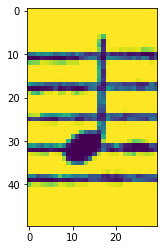

In [17]:
# Print a selected item of the test dataset
print_sample(OMRDataset.__getitem__(test_dataset,500))

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]]), 0)


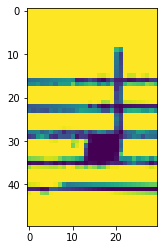

In [18]:
# Print a random item of the transformed dataset
print_sample(OMRDataset.__getitem__(train_dataset, random.randint(0,OMRDataset.__len__(train_dataset))))

# Convolutional steps

### General parameters

In [17]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

config = {'lr': 1e-4,
          'momentum': 0.9,
          'weight_decay': 0.001,
          'batch_size': 1,  # due to small number of images in the dataset (otherwise bad prediction)
          'epochs': 10,
          'device': 'cpu',
          'seed': 314}

# set the seeds to repeat the experiments
if 'cuda' in config['device']:
    torch.cuda.manual_seed_all(config['seed'])
else:
    torch.manual_seed(config['seed'])

cpu


### Loss function

In [18]:
# Return the LOSS FUNCTION
def get_criterion():
    criterion = torch.nn.CrossEntropyLoss()
    #criterion = torch.nn.MSELoss()
    #criterion = torch.nn.BCELoss()
    
    return criterion

### Optimizer

In [19]:
# Return the OPTIMIZER
def get_optimizer(model):
    optimizer = optim.SGD(model.parameters(),
                          lr=config['lr'],
                          momentum=config['momentum'],
                          weight_decay=config['weight_decay'])
    #optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    return optimizer

### DataLoaders

In [20]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=config["batch_size"], shuffle=False)

### Trainer

In [21]:
class Trainer(object):
    def __init__(self, model, device, train_loader, test_loader, criterion, optimizer, classes, tot_classes_test):
        self.model = model.to(device)
        self.device = device
        self.criterion = criterion
        self.optimizer = optimizer
        self.softmax = nn.Softmax(dim=1)
        self.classes = classes
        self.tot_classes_test = tot_classes_test

        self.train_loader = train_loader
        self.test_loader = test_loader

    def train(self, epochs=10):
        test_acc, train_acc, classes_acc = self.evaluate()
        print('Initial accuracy')
        print('TEST: {}'.format(test_acc))
        print('TRAIN: {}'.format(train_acc))
        print('Classes: {}'.format(classes_acc))
        
        for epoch in range(1, epochs + 1):
            self.model.train()  # set the model to training mode
            for images, labels in tqdm(self.train_loader, total=len(self.train_loader)):
                self.optimizer.zero_grad()  # don't forget this line!
                
                images, labels = images.to(self.device), labels.to(self.device)

                output = self.softmax(self.model(images))
                loss = self.criterion(output, labels)
                train_losses.append(loss) # Save loss (train)
                
                loss.backward()  # compute the derivatives of the model
                optimizer.step()  # update weights according to the optimizer

            test_acc, train_acc, classes_acc = self.evaluate()
            test_accuracy.append(test_acc) # Save accuracy (test)
            train_accuracy.append(train_acc) # Save accuracy (train)
            
            print('\nAccuracy at epoch {}'.format(epoch))
            print('TEST: {}'.format(test_acc))
            print('TRAIN: {}'.format(train_acc))
            print('Classes: {}'.format(classes_acc))

    def evaluate(self):
        self.model.eval()  # set the model to eval mode
        total_train = 0
        total_test = 0

        classes_accuracy = {}
        for value in self.classes:
            classes_accuracy[value] = 0
            
        match_label = {}
        for i,item in enumerate(self.classes):
            match_label[str(i)] = str(item)
        
        # Accuracy TEST
        for images, labels in tqdm(self.test_loader, total=len(self.test_loader)):
            
            images, labels = images.to(self.device), labels.to(self.device)

            output = self.softmax(self.model(images))
            predicted = torch.max(output, dim=1)[1]  # argmax the output
            total_test += (predicted == labels).sum().item()
            
            # Accuracy per class (confusion matrix)        
            prediction2 = int(torch.max(output.data, 1)[1].numpy())
            acc_temp = (predicted == labels).sum().item()            
            classes_accuracy[match_label[str(prediction2)]] += acc_temp
        
        for i, (k, v) in enumerate(classes_accuracy.copy().items()): # CHECK AL METODO "copy()"
            classes_accuracy[k] /= self.tot_classes_test[k]
        
        # Accuracy TRAIN
        for images, labels in tqdm(self.train_loader, total=len(self.train_loader)):
            
            images, labels = images.to(self.device), labels.to(self.device)

            output = self.softmax(self.model(images))
            predicted = torch.max(output, dim=1)[1]  # argmax the output
            total_train += (predicted == labels).sum().item()

        return total_test/len(self.test_loader.dataset), total_train/len(self.train_loader.dataset), classes_accuracy

## NOTE AND REST

In [22]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.feat_extractor = nn.Sequential(nn.Conv2d(1, 64, 3),
                                            nn.ReLU(),
                                            nn.BatchNorm2d(64),
                                            nn.MaxPool2d(2),
                                            nn.Conv2d(64, 128, 3),
                                            nn.ReLU(),
                                            nn.BatchNorm2d(128),
                                            nn.MaxPool2d(2),
                                            nn.Conv2d(128, 256, 3),
                                            nn.ReLU(),
                                            nn.BatchNorm2d(256),
                                            nn.MaxPool2d(2)
                                           )

        self.classifier = nn.Sequential(nn.Linear(2 * 4 * 256, 1024),
                                        nn.ReLU(),
                                        nn.Linear(1024, 1024),
                                        nn.ReLU(),
                                        nn.Linear(1024, 2)) # 2 is the number of classes

    def forward(self, x):
        x = self.feat_extractor(x)
        n, c, h, w = x.shape
        x = x.view(n, -1)
        x = self.classifier(x)
        return x

In [23]:
# NOTE AND REST
model_note_rest = CNN()
criterion = get_criterion()
optimizer = get_optimizer(model_note_rest)

trainer = Trainer(model_note_rest, config['device'], train_loader, test_loader, criterion, optimizer, note_rest_classes, note_rest_tot_classes_test)

In [154]:
# Getting loss
train_losses = []
test_losses = []

# Getting accuracy
train_accuracy = []
test_accuracy = []

trainer.train(epochs=config['epochs'])

  0%|          | 1/2676 [00:00<05:56,  7.49it/s]

Initial accuracy
TEST: 0.8449477351916377
TRAIN: 0.8602391629297459
Classes: {'note': 1.0, 'rest': 0.0}


  0%|          | 0/2676 [00:00<?, ?it/s]


Accuracy at epoch 1
TEST: 0.9451219512195121
TRAIN: 0.9644992526158446
Classes: {'note': 0.9958762886597938, 'rest': 0.6685393258426966}


  0%|          | 1/2676 [00:00<05:18,  8.41it/s]


Accuracy at epoch 2
TEST: 0.9782229965156795
TRAIN: 0.9891629297458894
Classes: {'note': 0.9958762886597938, 'rest': 0.8820224719101124}


  0%|          | 1/2676 [00:00<05:08,  8.68it/s]


Accuracy at epoch 3
TEST: 0.9747386759581882
TRAIN: 0.9891629297458894
Classes: {'note': 0.9989690721649485, 'rest': 0.8426966292134831}


  0%|          | 1/2676 [00:00<05:24,  8.24it/s]


Accuracy at epoch 4
TEST: 0.980836236933798
TRAIN: 0.9951420029895366
Classes: {'note': 0.9979381443298969, 'rest': 0.8876404494382022}


100%|██████████| 2676/2676 [00:17<00:00, 150.56it/s]


Accuracy at epoch 5
TEST: 0.9817073170731707
TRAIN: 0.9943946188340808
Classes: {'note': 0.9979381443298969, 'rest': 0.8932584269662921}


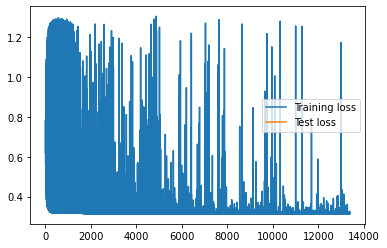

In [155]:
# plotting the training and test loss
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.show()

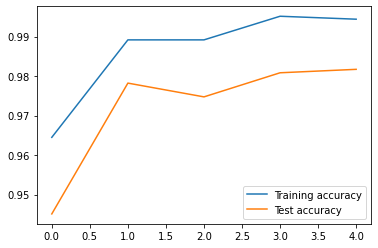

In [156]:
# plotting the training and test accuracy
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(test_accuracy, label='Test accuracy')
plt.legend()
plt.show()

### Save and Load model

In [165]:
# Save model to resume later
PATH_TO_SAVE = "model/model_note_rest.pth"

torch.save(model_note_rest.state_dict(), PATH_TO_SAVE)

In [24]:
# Load model
PATH_TO_SAVE = "model/model_note_rest.pth"

model_note_rest.load_state_dict(torch.load(PATH_TO_SAVE, map_location=torch.device('cpu')))
model_note_rest.eval()

CNN(
  (feat_extractor): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=2048, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_fe

## NOTE DURATION

In [25]:
class CNN_note_duration(nn.Module):
    def __init__(self):
        super().__init__()
        self.feat_extractor = nn.Sequential(nn.Conv2d(1, 64, 3),
                                            nn.ReLU(),
                                            nn.BatchNorm2d(64),
                                            nn.MaxPool2d(2),
                                            nn.Conv2d(64, 128, 3),
                                            nn.ReLU(),
                                            nn.BatchNorm2d(128),
                                            nn.MaxPool2d(2),
                                            nn.Conv2d(128, 256, 3),
                                            nn.ReLU(),
                                            nn.BatchNorm2d(256),
                                            nn.MaxPool2d(2)
                                           )

        self.classifier = nn.Sequential(nn.Linear(2 * 4 * 256, 1024),
                                        nn.ReLU(),
                                        nn.Linear(1024, 1024),
                                        nn.ReLU(),
                                        nn.Linear(1024, 5)) # 5 è il numero di classi

    def forward(self, x):
        x = self.feat_extractor(x)
        n, c, h, w = x.shape
        x = x.view(n, -1)
        x = self.classifier(x)
        return x

In [26]:
# NOTE DURATION
model_note_duration = CNN_note_duration()
criterion = get_criterion()
optimizer = get_optimizer(model_note_duration)

trainer = Trainer(model_note_duration, config['device'], train_loader, test_loader, criterion, optimizer, note_duration_classes, note_duration_tot_classes_test)

In [24]:
# Getting loss
train_losses = []
test_losses = []

# Getting accuracy
train_accuracy = []
test_accuracy = []

trainer.train(epochs=config['epochs'])

  0%|          | 1/2283 [00:00<04:08,  9.18it/s]

Initial accuracy
TEST: 0.39632277834525026
TRAIN: 0.39640823477879983
Classes: {'eighth': 0.9897959183673469, 'half': 0.0, 'quarter': 0.0, 'sixteenth': 0.0, 'whole': 0.0}


  0%|          | 2/2283 [00:00<02:27, 15.48it/s]


Accuracy at epoch 1
TEST: 0.6189989785495403
TRAIN: 0.6303109943057381
Classes: {'eighth': 0.9030612244897959, 'half': 0.0, 'quarter': 0.7078651685393258, 'sixteenth': 0.0, 'whole': 0.0}


  0%|          | 2/2283 [00:00<02:26, 15.57it/s]


Accuracy at epoch 2
TEST: 0.6782431052093973
TRAIN: 0.7091546211125712
Classes: {'eighth': 0.9744897959183674, 'half': 0.0, 'quarter': 0.7921348314606742, 'sixteenth': 0.0, 'whole': 0.0}


  0%|          | 2/2283 [00:00<03:25, 11.08it/s]


Accuracy at epoch 3
TEST: 0.7099080694586313
TRAIN: 0.7428821725799387
Classes: {'eighth': 0.9362244897959183, 'half': 0.0, 'quarter': 0.9213483146067416, 'sixteenth': 0.0, 'whole': 0.0}


  0%|          | 2/2283 [00:00<02:36, 14.59it/s]


Accuracy at epoch 4
TEST: 0.7150153217568948
TRAIN: 0.7402540516863776
Classes: {'eighth': 0.9770408163265306, 'half': 0.0, 'quarter': 0.8904494382022472, 'sixteenth': 0.0, 'whole': 0.0}


  0%|          | 2/2283 [00:00<02:29, 15.31it/s]


Accuracy at epoch 5
TEST: 0.7007150153217568
TRAIN: 0.7240473061760841
Classes: {'eighth': 0.9872448979591837, 'half': 0.0, 'quarter': 0.8398876404494382, 'sixteenth': 0.0, 'whole': 0.0}


  0%|          | 2/2283 [00:00<02:29, 15.21it/s]


Accuracy at epoch 6
TEST: 0.7231869254341164
TRAIN: 0.7560227770477442
Classes: {'eighth': 0.9387755102040817, 'half': 0.0, 'quarter': 0.9550561797752809, 'sixteenth': 0.0, 'whole': 0.0}


  0%|          | 2/2283 [00:00<02:31, 15.08it/s]


Accuracy at epoch 7
TEST: 0.7252298263534218
TRAIN: 0.7582128777923784
Classes: {'eighth': 0.9668367346938775, 'half': 0.3548387096774194, 'quarter': 0.8061797752808989, 'sixteenth': 0.0, 'whole': 0.0}


  0%|          | 2/2283 [00:00<02:30, 15.17it/s]


Accuracy at epoch 8
TEST: 0.7180796731358529
TRAIN: 0.7542706964520368
Classes: {'eighth': 0.9846938775510204, 'half': 0.6290322580645161, 'quarter': 0.6713483146067416, 'sixteenth': 0.0, 'whole': 0.0}


  0%|          | 2/2283 [00:00<02:25, 15.63it/s]


Accuracy at epoch 9
TEST: 0.7323799795709908
TRAIN: 0.7774857643451599
Classes: {'eighth': 0.9821428571428571, 'half': 0.7903225806451613, 'quarter': 0.6573033707865169, 'sixteenth': 0.0, 'whole': 0.0}


100%|██████████| 2283/2283 [00:15<00:00, 143.99it/s]


Accuracy at epoch 10
TEST: 0.7773237997957099
TRAIN: 0.8042049934296978
Classes: {'eighth': 0.9617346938775511, 'half': 0.5080645161290323, 'quarter': 0.901685393258427, 'sixteenth': 0.0, 'whole': 0.0}


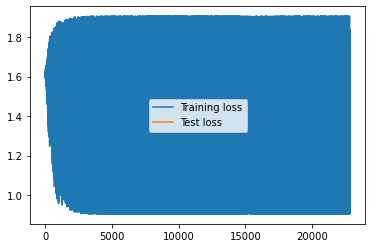

In [25]:
# plotting the training and test loss
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.show()

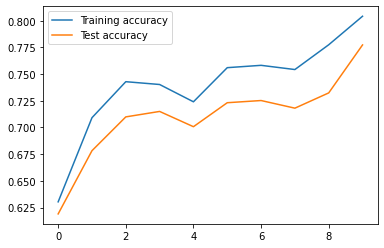

In [26]:
# plotting the training and test accuracy
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(test_accuracy, label='Test accuracy')
plt.legend()
plt.show()

### Save and Load model

In [27]:
# Save model to resume later
PATH_TO_SAVE = "model/model_note_duration.pth"

torch.save(model_note_duration.state_dict(), PATH_TO_SAVE)

In [27]:
# Load model
PATH_TO_SAVE = "model/model_note_duration.pth"

model_note_duration.load_state_dict(torch.load(PATH_TO_SAVE, map_location=torch.device('cpu')))
model_note_duration.eval()

CNN_note_duration(
  (feat_extractor): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=2048, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4)

## REST DURATION

In [28]:
class CNN_rest_duration(nn.Module):
    def __init__(self):
        super().__init__()
        self.feat_extractor = nn.Sequential(nn.Conv2d(1, 64, 3),
                                            nn.ReLU(),
                                            nn.BatchNorm2d(64),
                                            nn.MaxPool2d(2),
                                            nn.Conv2d(64, 128, 3),
                                            nn.ReLU(),
                                            nn.BatchNorm2d(128),
                                            nn.MaxPool2d(2),
                                            nn.Conv2d(128, 256, 3),
                                            nn.ReLU(),
                                            nn.BatchNorm2d(256),
                                            nn.MaxPool2d(2)
                                           )

        self.classifier = nn.Sequential(nn.Linear(2 * 4 * 256, 1024),
                                        nn.ReLU(),
                                        nn.Linear(1024, 1024),
                                        nn.ReLU(),
                                        nn.Linear(1024, 5)) # 5 è il numero di classi

    def forward(self, x):
        x = self.feat_extractor(x)
        n, c, h, w = x.shape
        #print(c,h,w)
        x = x.view(n, -1)
        x = self.classifier(x)
        return x

In [29]:
# REST DURATION
model_rest_duration = CNN_rest_duration()
criterion = get_criterion()
optimizer = get_optimizer(model_rest_duration)

trainer = Trainer(model_rest_duration, config['device'], train_loader, test_loader, criterion, optimizer, rest_duration_classes, rest_duration_tot_classes_test)

In [78]:
# Getting loss
train_losses = []
test_losses = []

# Getting accuracy
train_accuracy = []
test_accuracy = []

trainer.train(epochs=config['epochs'])

  0%|          | 2/4636 [00:00<04:55, 15.68it/s]

Initial accuracy
TEST: 0.4919517102615694
TRAIN: 0.47627264883520276
Classes: {'eighth': 0.9989785495403473, 'half': 0.0, 'quarter': 0.0, 'sixteenth': 0.0, 'whole': 0.0}


  0%|          | 2/4636 [00:00<05:00, 15.40it/s]


Accuracy at epoch 1
TEST: 0.8687122736418511
TRAIN: 0.8718723037100949
Classes: {'eighth': 1.0, 'half': 0.0, 'quarter': 0.9973333333333333, 'sixteenth': 0.0, 'whole': 0.0}


  0%|          | 2/4636 [00:00<05:04, 15.22it/s]


Accuracy at epoch 2
TEST: 0.9069416498993964
TRAIN: 0.9165228645383952
Classes: {'eighth': 0.9989785495403473, 'half': 0.0, 'quarter': 0.9933333333333333, 'sixteenth': 0.0, 'whole': 0.6153846153846154}


  0%|          | 2/4636 [00:00<05:02, 15.33it/s]


Accuracy at epoch 3
TEST: 0.9823943661971831
TRAIN: 0.980802415875755
Classes: {'eighth': 1.0, 'half': 0.8492063492063492, 'quarter': 0.992, 'sixteenth': 0.0, 'whole': 0.9461538461538461}


  0%|          | 2/4636 [00:00<05:08, 15.04it/s]


Accuracy at epoch 4
TEST: 0.9894366197183099
TRAIN: 0.9892148403796376
Classes: {'eighth': 1.0, 'half': 0.9444444444444444, 'quarter': 0.996, 'sixteenth': 0.0, 'whole': 0.9384615384615385}


100%|██████████| 4636/4636 [00:32<00:00, 144.14it/s]


Accuracy at epoch 5
TEST: 0.9874245472837022
TRAIN: 0.9879206212251941
Classes: {'eighth': 1.0, 'half': 0.9761904761904762, 'quarter': 0.9893333333333333, 'sixteenth': 0.0, 'whole': 0.9153846153846154}


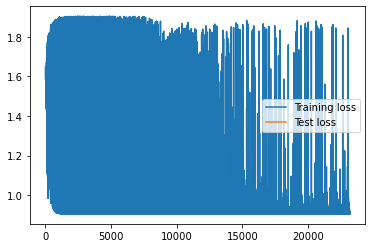

In [79]:
# plotting the training and test loss
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.show()

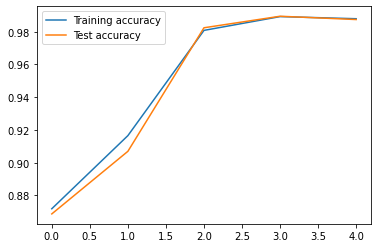

In [80]:
# plotting the training and test accuracy
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(test_accuracy, label='Test accuracy')
plt.legend()
plt.show()

### Save and Load model

In [108]:
# Save model to resume later
PATH_TO_SAVE = "model/model_rest_duration.pth"

torch.save(model_rest_duration.state_dict(), PATH_TO_SAVE)

In [30]:
# Load model
PATH_TO_SAVE = "model/model_rest_duration_T.pth"

model_rest_duration.load_state_dict(torch.load(PATH_TO_SAVE, map_location=torch.device('cpu')))
model_rest_duration.eval()

CNN_rest_duration(
  (feat_extractor): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=2048, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4)

## NOTE PITCH

In [31]:
class CNN_note_pitch(nn.Module):
    def __init__(self):
        super().__init__()
        self.feat_extractor = nn.Sequential(nn.Conv2d(1, 64, 3),
                                            nn.ReLU(),
                                            nn.BatchNorm2d(64),
                                            nn.MaxPool2d(2),
                                            nn.Conv2d(64, 128, 3),
                                            nn.ReLU(),
                                            nn.BatchNorm2d(128),
                                            nn.MaxPool2d(2),
                                            nn.Conv2d(128, 256, 3),
                                            nn.ReLU(),
                                            nn.BatchNorm2d(256),
                                            nn.MaxPool2d(2)
                                           )

        self.classifier = nn.Sequential(nn.Linear(2 * 4 * 256, 1024),
                                        nn.ReLU(),
                                        nn.Linear(1024, 1024),
                                        nn.ReLU(),
                                        nn.Linear(1024, 17)) # 17 è il numero di classi

    def forward(self, x):
        x = self.feat_extractor(x)
        n, c, h, w = x.shape
        #print(c,h,w)
        x = x.view(n, -1)
        x = self.classifier(x)
        return x

In [32]:
# NOTE PITCH
model_note_pitch = CNN_note_pitch()
criterion = get_criterion()
optimizer = get_optimizer(model_note_pitch)

trainer = Trainer(model_note_pitch, config['device'], train_loader, test_loader, criterion, optimizer, note_pitch_classes, note_pitch_tot_classes_test)

In [222]:
# Getting loss
train_losses = []
test_losses = []

# Getting accuracy
train_accuracy = []
test_accuracy = []

trainer.train(epochs=config['epochs'])

  0%|          | 2/2289 [00:00<02:46, 13.70it/s]

Initial accuracy
TEST: 0.10488798370672098
TRAIN: 0.09785932721712538
Classes: {'a': 0.0, 'a1': 0.0, 'a2': 0.0, 'c1': 0.0, 'c2': 0.0, 'c3': 0.0, 'd1': 0.0, 'd2': 0.0, 'e1': 0.0, 'e2': 0.0, 'f1': 0.8879310344827587, 'f2': 0.0, 'g1': 0.0, 'g2': 0.0, 'h': 0.0, 'h1': 0.0, 'h2': 0.0}


  0%|          | 2/2289 [00:00<02:32, 15.00it/s]


Accuracy at epoch 1
TEST: 0.22912423625254583
TRAIN: 0.25688073394495414
Classes: {'a': 0.0, 'a1': 0.9661016949152542, 'a2': 0.0, 'c1': 0.0, 'c2': 0.0, 'c3': 0.0, 'd1': 0.0, 'd2': 0.0, 'e1': 0.0, 'e2': 0.0, 'f1': 0.0, 'f2': 0.0, 'g1': 0.11458333333333333, 'g2': 0.0, 'h': 0.0, 'h1': 0.9345794392523364, 'h2': 0.0}


  0%|          | 2/2289 [00:00<02:35, 14.72it/s]


Accuracy at epoch 2
TEST: 0.4592668024439919
TRAIN: 0.4831804281345566
Classes: {'a': 0.0, 'a1': 0.9152542372881356, 'a2': 0.0, 'c1': 0.0, 'c2': 0.0, 'c3': 0.0, 'd1': 0.0, 'd2': 0.0, 'e1': 0.890625, 'e2': 0.0, 'f1': 0.4396551724137931, 'f2': 0.0, 'g1': 0.8020833333333334, 'g2': 0.0, 'h': 0.0, 'h1': 0.9439252336448598, 'h2': 0.0}


  0%|          | 2/2289 [00:00<02:31, 15.06it/s]


Accuracy at epoch 3
TEST: 0.5122199592668024
TRAIN: 0.5522062035823504
Classes: {'a': 0.0, 'a1': 0.9322033898305084, 'a2': 0.0, 'c1': 0.0, 'c2': 0.0, 'c3': 0.0, 'd1': 0.0, 'd2': 0.0, 'e1': 0.8359375, 'e2': 0.0, 'f1': 0.8362068965517241, 'f2': 0.0, 'g1': 0.9270833333333334, 'g2': 0.0, 'h': 0.0, 'h1': 0.9345794392523364, 'h2': 0.0}


  0%|          | 2/2289 [00:00<02:47, 13.61it/s]


Accuracy at epoch 4
TEST: 0.6334012219959266
TRAIN: 0.672346002621232
Classes: {'a': 0.0, 'a1': 0.940677966101695, 'a2': 0.0, 'c1': 0.0, 'c2': 0.6666666666666666, 'c3': 0.0, 'd1': 0.0, 'd2': 0.6219512195121951, 'e1': 0.921875, 'e2': 0.0, 'f1': 0.9224137931034483, 'f2': 0.0, 'g1': 0.9270833333333334, 'g2': 0.0, 'h': 0.0, 'h1': 0.8598130841121495, 'h2': 0.0}


100%|██████████| 2289/2289 [00:16<00:00, 138.81it/s]


Accuracy at epoch 5
TEST: 0.675152749490835
TRAIN: 0.7068588903451288
Classes: {'a': 0.0, 'a1': 0.9661016949152542, 'a2': 0.0, 'c1': 0.0, 'c2': 0.9135802469135802, 'c3': 0.0, 'd1': 0.0, 'd2': 0.8658536585365854, 'e1': 0.8984375, 'e2': 0.0, 'f1': 0.896551724137931, 'f2': 0.0, 'g1': 0.96875, 'g2': 0.0, 'h': 0.0, 'h1': 0.8598130841121495, 'h2': 0.0}


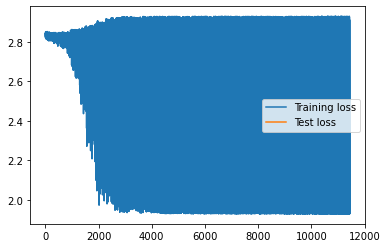

In [223]:
# plotting the training and test loss
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.show()

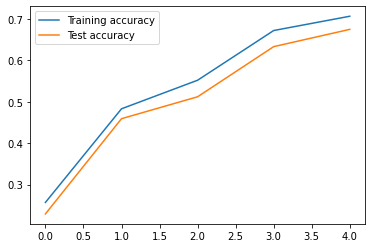

In [224]:
# plotting the training and test accuracy
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(test_accuracy, label='Test accuracy')
plt.legend()
plt.show()

### Save and Load model

In [225]:
# Save model to resume later
PATH_TO_SAVE = "model/model_note_pitch.pth"

torch.save(model_note_pitch.state_dict(), PATH_TO_SAVE)

In [33]:
# Load model
PATH_TO_SAVE = "model/model_note_pitch.pth"

model_note_pitch.load_state_dict(torch.load(PATH_TO_SAVE, map_location=torch.device('cpu')))
model_note_pitch.eval()

CNN_note_pitch(
  (feat_extractor): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=2048, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): L

## Prediction test

In [43]:
for images, labels in tqdm(test_loader, total=len(test_loader)):
    
    image_test = images
    label_test = labels

print("Truth: ", label_test)

softmax_f = nn.Softmax(dim=1)
output = softmax_f(model_note_duration(image_test))

predicted = torch.max(output, dim=1)[1]  # argmax the output
print("Predicted: ", predicted)
print(predicted.shape)

100%|██████████| 979/979 [00:00<00:00, 2557.42it/s]


Truth:  tensor([0])
Predicted:  tensor([0])
torch.Size([1])


(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]]), 1)


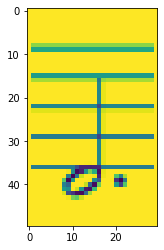

torch.Size([1, 50, 30])
Prediction:  tensor([1])
Prediction 2:  1


In [46]:
""""""""""""""""""""
img_sample = OMRDataset.__getitem__(test_dataset,222) #500, 83, 291, 123, 762, 493, 91
print_sample(img_sample)
print(img_sample[0].shape)
img_sample = transformations(img_sample[0])
img_sample = img_sample.unsqueeze(0)
        
softmax_f = nn.Softmax(dim=1)
output = softmax_f(model_note_duration(img_sample))
predicted = torch.max(output, dim=1)[1]  # argmax the output

prediction2 = int(torch.max(output.data, 1)[1].numpy())

print("Prediction: ", predicted)
print("Prediction 2: ", prediction2)

## Sliding window and Classification

In [34]:
# Function to generate a SLIDING WINDOW over the image
def sliding_window(image, stepSize, windowSize, count):        
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize[1]):
        for x in range(0, image.shape[1], stepSize[0]):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [35]:
# Transformations to be applied
transformations_roi = transforms.Compose([transforms.ToPILImage(),
                                          transforms.Resize((50,30)),
                                          transforms.Grayscale(),
                                          transforms.ToTensor(),
                                          transforms.Normalize((0.5,), (0.5,))
                                          #transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                           #std=[0.229, 0.224, 0.225])
                                         ])

In [53]:
prediction_list = []

# Music sheet files

#image = cv2.imread("music_sheets/Test_random.jpg")
image = cv2.imread("music_sheets/Simphony40_Mozart.jpg")
#image = cv2.imread("music_sheets/Primavera_Vivaldi.jpg")

# Initial resize
scale = 3
w = int(image.shape[1] / scale)
image = imutils.resize(image, width=w)

# Dimensions of sliding window and stepSize
(window_W, window_H) = (50, 70)
(stepSize_W, stepSize_H) = (50, 58)

count = 1

# loop over the sliding window for each layer of the pyramid
for (x, y, window) in sliding_window(image, stepSize=(stepSize_W, stepSize_H), windowSize=(window_W, window_H), count=count):
    # if the window does not meet our desired window size, ignore it
    if window.shape[0] != window_H or window.shape[1] != window_W:
         continue
        
    # Process the window (Region Of Interest) applying the classifier to the content of the window
    roi = image[y:y + window_H, x:x + window_W]        
        
    roi = transformations_roi(roi)
    roi = roi.unsqueeze(0)
    #print(roi.shape)
    #print(count)
    #print_sample(roi)
    
    pred_str = ""
    
    # Predict note or rest
    softmax_f = nn.Softmax(dim=1)
    output = softmax_f(model_note_rest(roi))
    prediction = int(torch.max(output.data, 1)[1].numpy())
    
    if prediction == 0: # is a note
        pred_str = "note_"
        
        # Predict duration
        output = softmax_f(model_note_duration(roi))
        prediction = int(torch.max(output.data, 1)[1].numpy())
        if prediction == 0: pred_str += "eighth_"
        elif prediction == 1: pred_str += "half_"
        elif prediction == 2: pred_str += "quarter_"
        elif prediction == 3: pred_str += "sixteenth_"
        elif prediction == 4: pred_str += "whole_"
            
        # Predict pitch
        output = softmax_f(model_note_pitch(roi))
        prediction = int(torch.max(output.data, 1)[1].numpy())
        if prediction == 0:  pred_str += "a"
        elif prediction == 1: pred_str += "a1"
        elif prediction == 2: pred_str += "a2"
        elif prediction == 3: pred_str += "c1"
        elif prediction == 4: pred_str += "c2"
        elif prediction == 5: pred_str += "c3"
        elif prediction == 6: pred_str += "d1"
        elif prediction == 7: pred_str += "d2"
        elif prediction == 8: pred_str += "e1"
        elif prediction == 9: pred_str += "e2"
        elif prediction == 10: pred_str += "f1"
        elif prediction == 11: pred_str += "f2"
        elif prediction == 12: pred_str += "g1"
        elif prediction == 13: pred_str += "g2"
        elif prediction == 14: pred_str += "h"
        elif prediction == 15: pred_str += "h1"
        elif prediction == 16: pred_str += "h2"
        
    else: # is a rest
        pred_str = "rest_"
            
        output = softmax_f(model_rest_duration(roi))
        prediction = int(torch.max(output.data, 1)[1].numpy())
        if prediction == 0: pred_str += "eighth"
        elif prediction == 1: pred_str += "half"
        elif prediction == 2: pred_str += "quarter"
        elif prediction == 3: pred_str += "sixteenth"
        elif prediction == 4: pred_str += "whole"
            
    prediction_list.append(pred_str)
    count += 1
        
    # Draw the window at each step
    clone = image.copy()
    cv2.rectangle(clone, (x, y), (x + window_W, y + window_H), (0, 255, 0), 2)
    cv2.imshow("Optical Music Recognition", clone)
    cv2.waitKey(1)
    time.sleep(0.025)
    
    if count > 191:
        break
    
cv2.waitKey(0);
cv2.destroyAllWindows();
cv2.waitKey(1)

-1

In [54]:
print("1st STAFF")
print(prediction_list[59:76]) # 1st staff
print("\n2nd STAFF")
print(prediction_list[97:114]) # 2nd staff
print("\n3rd STAFF")
print(prediction_list[135:152])  # 3rd staff
print("\n4th STAFF")
print(prediction_list[173:190])  # 4th staff

#TERMINA A: 190 per "Test random"
#           190 per "Simphony n.40"
#           180 per "La Primavera"



#print("\n")
#print(prediction_list[211:228])  # 5th staff
#print("\n")
#print(prediction_list[249:266])  # 6th staff

1st STAFF
['note_eighth_f1', 'note_sixteenth_e1', 'note_quarter_e1', 'note_eighth_f1', 'note_sixteenth_e1', 'note_quarter_g1', 'note_eighth_f1', 'note_sixteenth_e1', 'note_quarter_e1', 'note_quarter_c2', 'rest_quarter', 'note_eighth_c2', 'note_eighth_c2', 'note_quarter_a1', 'note_eighth_c1', 'note_eighth_g1', 'note_quarter_f1']

2nd STAFF
['note_eighth_f1', 'note_sixteenth_e1', 'note_half_d1', 'rest_quarter', 'note_sixteenth_g1', 'note_sixteenth_d1', 'note_quarter_d1', 'note_sixteenth_e1', 'note_sixteenth_d1', 'note_quarter_d1', 'note_sixteenth_e1', 'note_sixteenth_d1', 'note_quarter_d1', 'note_quarter_h1', 'rest_half', 'note_quarter_g1', 'note_quarter_g1']

3rd STAFF
['note_eighth_g1', 'note_eighth_f1', 'note_quarter_e1', 'note_sixteenth_e1', 'note_sixteenth_d1', 'note_quarter_c1', 'rest_quarter', 'rest_quarter', 'note_eighth_c2', 'note_sixteenth_h1', 'note_quarter_h1', 'note_sixteenth_d2', 'note_quarter_g1', 'note_quarter_h1', 'note_quarter_a1', 'note_half_c1', 'note_quarter_c1']

4t

In [55]:
""" Simboli sul pentagramma: 17 scansioni """
""" Spazio tra pentagrammi: 19 scansioni + 1 della chiave """
        
# Merge good predictions:
prediction_list = prediction_list[59:76] + prediction_list[97:114] + prediction_list[135:152] + prediction_list[173:190]


# Post-processing (Sonic Pi)

### Run Sonic Pi

In [39]:
# run Sonic Pi on computer
os.system("""osascript -e 'tell app "Sonic Pi" to open'""")

# subprocess.call(["/usr/bin/open", "-W", "-n", "-a", "/Applications/Sonic Pi.app"])

256

In [40]:
from psonic import *

In [56]:
for pred in prediction_list:
    p = pred.split('_')
    if p[0] == "note":
        if p[2] == "a": play(A3)
        elif p[2] == "a1": play(A4)
        elif p[2] == "a2": play(A5)
        elif p[2] == "c1": play(C4)
        elif p[2] == "c2": play(C5)
        elif p[2] == "c3": play(C6)
        elif p[2] == "d1": play(D4)
        elif p[2] == "d2": play(D5)
        elif p[2] == "e1": play(E4)
        elif p[2] == "e2": play(E5)
        elif p[2] == "f1": play(F4)
        elif p[2] == "f2": play(F5)
        elif p[2] == "g1": play(G4)
        elif p[2] == "g2": play(G5)
        elif p[2] == "h": play(B3)
        elif p[2] == "h1": play(B4)
        elif p[2] == "h2": play(B5)
        
        if p[1] == "eighth": sleep(0.250)
        elif p[1] == "half": sleep(1)
        elif p[1] == "quarter": sleep(0.50)
        elif p[1] == "sixteenth": sleep(0.125)
        elif p[1] == "whole": sleep(2)
            
    else:
        if p[1] == "eighth": sleep(0.250)
        elif p[1] == "half": sleep(1)
        elif p[1] == "quarter": sleep(0.50)
        elif p[1] == "sixteenth": sleep(0.125)
        elif p[1] == "whole": sleep(2)
    
# https://pypi.org/project/python-sonic/
# https://github.com/gkvoelkl/python-sonic
# https://musescore.com/sheetmusic/artists

### Kill Sonic Pi

In [85]:
# kill Sonic Pi
os.system("pkill Sonic Pi")

0

In [34]:
"""# Function to RESCALE the test image
def pyramid(image, scale=1.3, minSize=(30, 30)):
    # yield the original image
    yield image
 
    # keep looping over the pyramid
    while True:
        # compute the new dimensions of the image and resize it
        w = int(image.shape[1] / scale)
        image = imutils.resize(image, width=w)
 
        # if the resized image is over the minimum size, stop
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
 
        # yield the next image in the pyramid
        yield image"""

In [172]:
"""list_notes = [] # prediction list

image = cv2.imread("music_sheets/test2.jpg") # music sheet file

# Initial resize
scale = 1.3
w = int(image.shape[1] / scale)
image = imutils.resize(image, width=w)

(window_W, window_H) = (120, 200) # Dimensions of sliding window

# loop over the image pyramid
for resized in pyramid(image, scale=scale):
    # loop over the sliding window for each layer of the pyramid
    for (x, y, window) in sliding_window(resized, stepSize=140, windowSize=(window_W, window_H)):
        # if the window does not meet our desired window size, ignore it
        if window.shape[0] != window_H or window.shape[1] != window_W:
            continue
        
        # Process the window (Region Of Interest) applying the classifier to the content of the window
        roi = image[y:y + window_H, x:x + window_W]        
        
        roi = transformations_roi(roi)
        roi = roi.unsqueeze(0)
        #print(roi.shape)
        #print_sample(roi)
        
        softmax_f = nn.Softmax(dim=1)
        output = softmax_f(model(roi))
        predicted = torch.max(output, dim=1)[1]  # argmax the output
        list_notes.append(predicted)
        #break
        
        # Draw the window at each step
        clone = resized.copy()
        cv2.rectangle(clone, (x, y), (x + window_W, y + window_H), (0, 255, 0), 2)
        cv2.imshow("Optical Music Recognition", clone)
        cv2.waitKey(1)
        time.sleep(0.025)"""